# 11.1. Manipulating the exposure of an image

1. Let's import the packages.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.exposure as skie

2. We open an image with matplotlib. We only take a single RGB component to have a grayscale image.

In [9]:
img = plt.imread('data/pic1.jpg')[...,0]
print(img.shape)
print(img[:5])

(288, 512)
[[221 221 221 ..., 233 233 233]
 [221 221 221 ..., 233 233 233]
 [223 223 223 ..., 233 233 233]
 [223 223 223 ..., 233 233 233]
 [225 225 225 ..., 233 233 233]]


3. We create a function that displays the image along with its **histogram**.

In [10]:
def show(img):
    # Display the image.
    plt.subplot(121)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')
    
    # Display the histgram
    plt.subplot(122)
    plt.hist(img.ravel(), lw=0, bins=256)
    plt.xlim(0, img.max())
    plt.yticks([])
    plt.show()

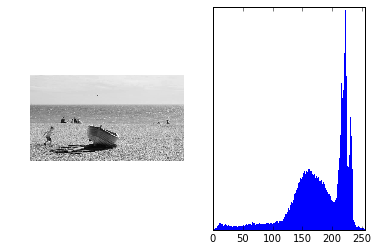

In [11]:
show(img)

The histogram is unbalanced and the image appears slightly over-exposed.

5. Now, we rescale the intensity of the image using scikit-image's `rescale_intensity` function. The `in_range` and `out_range` define a linear mapping from the original image to the modified image. The pixels that are outside `in_range` are clipped to the extremal values of `out_range`. Here, the darkest pixels (intensity less than 100) become completely black (0), whereas the brightest pixels (>240) become completely white (255).

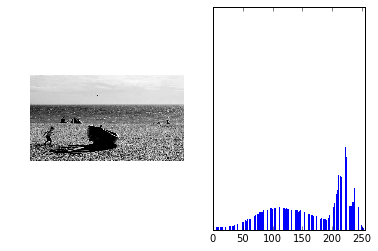

In [12]:
show(skie.rescale_intensity(
    img, in_range=(100, 240), out_range=(0, 255)))

Many intensity values seem to be missing in the histogram, which reflects the poor quality of this exposure correction technique.

6. We now use a more advanced exposure correction technique called **Contrast Limited Adaptive Histogram Equalization**.

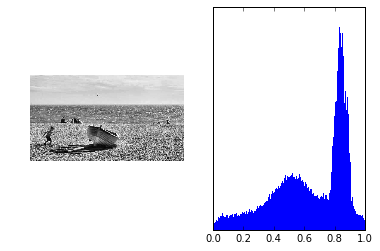

In [13]:
show(skie.equalize_adapthist(img))

The histogram seems more balanced, and the image now appears more contrasted.